# Importing Libraries

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [2]:
df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# Exploring Data

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.shape

(891, 12)

In [6]:
test_df.shape

(418, 11)

In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Wrangling

### Adding the column Title

In [13]:
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [14]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [15]:
test_df['Title'] = test_df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [16]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [17]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles 
df.Title = df.Title.map(normalized_titles)
# view value counts for the normalized titles
print(df.Title.value_counts())

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


In [18]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles 
test_df.Title = test_df.Title.map(normalized_titles)
# view value counts for the normalized titles
print(test_df.Title.value_counts())

Mr         240
Miss        78
Mrs         73
Master      21
Officer      5
Royalty      1
Name: Title, dtype: int64


### Calculating Median age to incooperate into missing values

In [19]:
# group by Sex, Pclass, and Title 
grouped = df.groupby(['Sex','Pclass', 'Title'])  
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64

In [20]:
# apply the grouped median value on the Age NaN
df.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [21]:
grouped1 = test_df.groupby(['Sex','Pclass', 'Title'])  
grouped1.Age.median()

Sex     Pclass  Title  
female  1       Miss       32.0
                Mrs        48.0
                Royalty    39.0
        2       Miss       19.5
                Mrs        29.0
        3       Miss       22.0
                Mrs        28.0
male    1       Master      9.5
                Mr         42.0
                Officer    53.0
        2       Master      5.0
                Mr         28.0
                Officer    35.5
        3       Master      7.0
                Mr         25.0
Name: Age, dtype: float64

In [22]:
test_df.Age = grouped1.Age.apply(lambda x: x.fillna(x.median()))

### Taking care of the fare column

In [23]:
test_df.Fare=test_df.Fare.fillna(test_df.Fare.median())

### Taking Care of the embarked column

In [24]:
count=df.Embarked.value_counts().index[0]

In [25]:
count

'S'

In [26]:
df.Embarked=df.Embarked.fillna(count)

### Taking care of the cabin column

In [27]:
df.Cabin=df.Cabin.fillna('U')
test_df.Cabin=df.Cabin.fillna('U')

### Correlation Matrix

In [46]:
corr_matr=df.corr()

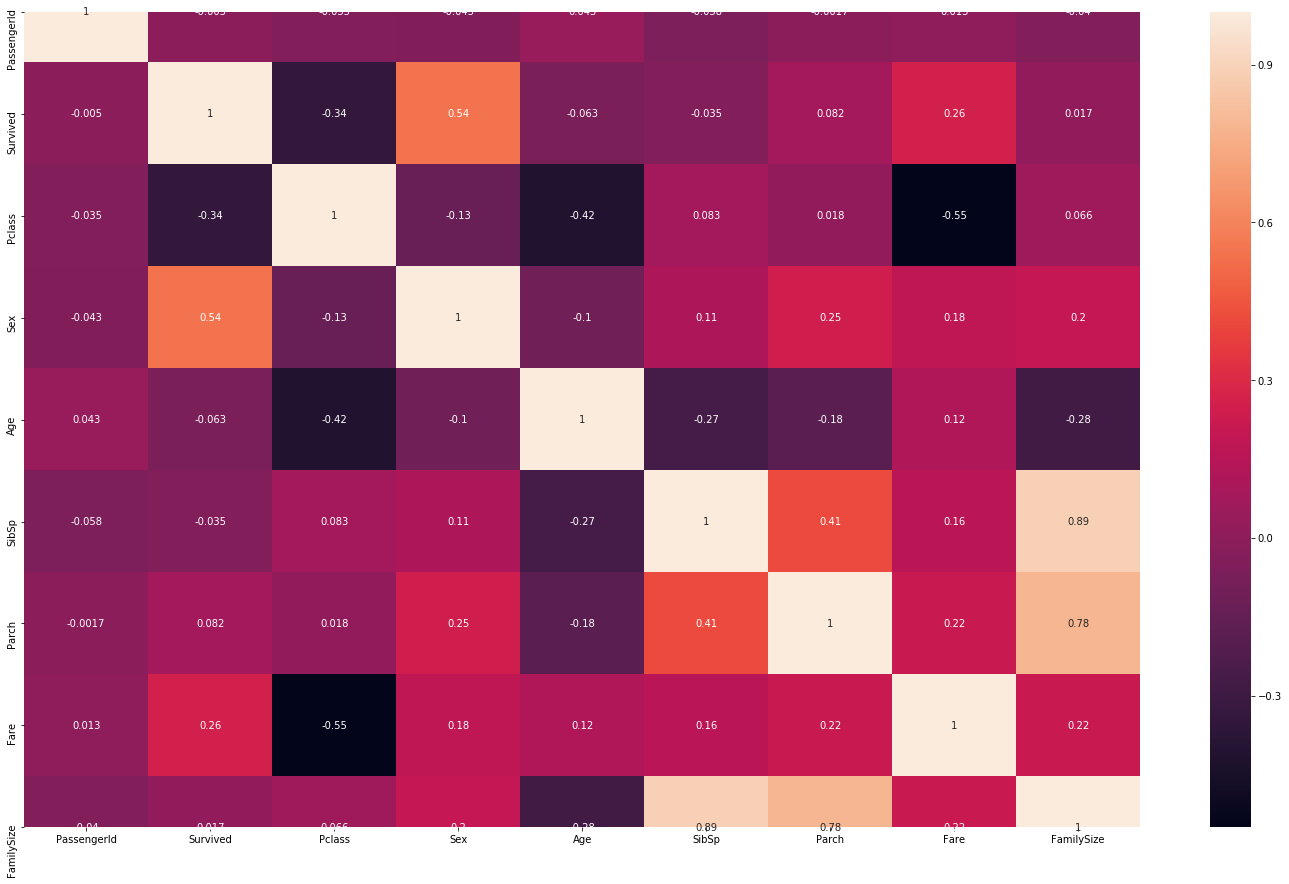

In [47]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr_matr, annot=True,ax=ax, vmax=1,)

In [50]:
df3=df

In [51]:
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,Mr,1


## Feature Engineering

### Creating a new column Family Size

In [29]:
df['FamilySize'] = df.Parch + df.SibSp + 1
test_df['FamilySize'] = test_df.Parch + test_df.SibSp + 1

In [30]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q,Mr,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C85,S,Mrs,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q,Mr,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C123,S,Mr,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S,Mrs,3


### Extracting first letter of the Cabin column

In [31]:
df.Cabin=df.Cabin.map(lambda x : x[0])
test_df.Cabin=test_df.Cabin.map(lambda x : x[0])

### One hot encoding

In [32]:
df.Sex = df.Sex.map({"male": 0, "female":1})
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(df.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(df.Title, prefix="Title")
cabin_dummies = pd.get_dummies(df.Cabin, prefix="Cabin")
embarked_dummies = pd.get_dummies(df.Embarked, prefix="Embarked")
# concatenate dummy columns with main dataset
df1 = pd.concat([df, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,1,0,0,1


### Scaling of Data

In [131]:
train_numerical_features = list(df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
df_ss = pd.DataFrame(data =df)
df_ss[train_numerical_features] = ss_scaler.fit_transform(df_ss[train_numerical_features])

In [132]:
df_ss.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,-1.730108,-0.789272,0.827377,"Braund, Mr. Owen Harris",-0.737695,-0.529244,0.432793,-0.473674,A/5 21171,-0.502445,U,S,Mr,0.059160
1,-1.726220,1.266990,-1.566107,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.355574,0.657030,0.432793,-0.473674,PC 17599,0.786845,C,C,Mrs,0.059160
2,-1.722332,1.266990,0.827377,"Heikkinen, Miss. Laina",1.355574,-0.232676,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,U,S,Miss,-0.560975
3,-1.718444,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.355574,0.434604,0.432793,-0.473674,113803,0.420730,C,S,Mrs,0.059160
4,-1.714556,-0.789272,0.827377,"Allen, Mr. William Henry",-0.737695,0.434604,-0.474545,-0.473674,373450,-0.486337,U,S,Mr,-0.560975


In [33]:
df1.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [142]:
df1.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,22.0,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,1,26.0,0,0,7.9250,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,0,35.0,0,0,8.0500,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Sex              891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
FamilySize       891 non-null int64
Pclass_1         891 non-null uint8
Pclass_2         891 non-null uint8
Pclass_3         891 non-null uint8
Title_Master     891 non-null uint8
Title_Miss       891 non-null uint8
Title_Mr         891 non-null uint8
Title_Mrs        891 non-null uint8
Title_Officer    891 non-null uint8
Title_Royalty    891 non-null uint8
Cabin_A          891 non-null uint8
Cabin_B          891 non-null uint8
Cabin_C          891 non-null uint8
Cabin_D          891 non-null uint8
Cabin_E          891 non-null uint8
Cabin_F          891 non-null uint8
Cabin_G          891 non-null uint8
Cabin_T          891 non-nu

### Testing Set One Hot Encoding

In [36]:
test_df.Sex = test_df.Sex.map({"male": 0, "female":1})
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(test_df.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(test_df.Title, prefix="Title")
cabin_dummies = pd.get_dummies(test_df.Cabin, prefix="Cabin")
embarked_dummies = pd.get_dummies(test_df.Embarked, prefix="Embarked")
# concatenate dummy columns with main dataset
dft = pd.concat([test_df, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

In [37]:
dft.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [38]:
dft.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,892,0,34.5,0,0,7.8292,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,893,1,47.0,1,0,7.0000,2,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,894,0,62.0,0,0,9.6875,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,895,0,27.0,0,0,8.6625,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,896,1,22.0,1,1,12.2875,3,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [39]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 28 columns):
PassengerId      418 non-null int64
Sex              418 non-null int64
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
FamilySize       418 non-null int64
Pclass_1         418 non-null uint8
Pclass_2         418 non-null uint8
Pclass_3         418 non-null uint8
Title_Master     418 non-null uint8
Title_Miss       418 non-null uint8
Title_Mr         418 non-null uint8
Title_Mrs        418 non-null uint8
Title_Officer    418 non-null uint8
Title_Royalty    418 non-null uint8
Cabin_A          418 non-null uint8
Cabin_B          418 non-null uint8
Cabin_C          418 non-null uint8
Cabin_D          418 non-null uint8
Cabin_E          418 non-null uint8
Cabin_F          418 non-null uint8
Cabin_G          418 non-null uint8
Cabin_T          418 non-null uint8
Cabin_U          418 non-nu

In [143]:
train_numerical_features = list(df1.select_dtypes(include=['float64']).columns)
ss_scaler = StandardScaler()
df1_ss = pd.DataFrame(data = df1)
df1_ss[train_numerical_features] = ss_scaler.fit_transform(df1_ss[train_numerical_features])

In [144]:
df1_ss.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,-0.529244,1,0,-0.502445,2,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,1,0.657030,1,0,0.786845,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,1,-0.232676,0,0,-0.488854,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1,1,0.434604,1,0,0.420730,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,0,0.434604,0,0,-0.486337,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [138]:
train_numerical_features = list(dft.select_dtypes(include=['float64']).columns)
ss_scaler = StandardScaler()
dft_ss = pd.DataFrame(data = dft)
dft_ss[train_numerical_features] = ss_scaler.fit_transform(dft_ss[train_numerical_features])

In [139]:
dft_ss.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,892,0,0.387338,0,0,-0.497413,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,893,1,1.337720,1,0,-0.512278,2,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,894,0,2.478178,0,0,-0.464100,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,895,0,-0.182892,0,0,-0.482475,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,896,1,-0.563045,1,1,-0.417492,3,0,0,1,...,0,0,0,0,0,0,1,0,0,1


# Model Selection and Implementation

In [40]:
X_train=df1.drop(['Survived','PassengerId'],axis=1)
y_train=df1['Survived']
X_test=dft.drop(['PassengerId'],axis=1)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 27)
(891,)
(418, 27)


### Random Forest

In [140]:
forrest_params = dict(    
    min_samples_split = [n for n in range(2, 5)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(50, 210, 10)]
)

In [84]:
rfc=RandomForestClassifier()

In [85]:
rfc_best=GridSearchCV(estimator=rfc, param_grid=forrest_params, cv=5)

In [86]:
rfc_best.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [73]:
print("Best score: {}".format(rfc_best.best_score_))
print("Optimal params: {}".format(rfc_best.best_estimator_))

Best score: 0.8383838383838383
Optimal params: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [58]:
    pred1=rfc_best.predict(X_test)

In [59]:
submission1 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": pred1
    })
submission1.to_csv('titanic_gridsearchcv8.csv', index=False)
print('Exported')

Exported


### Gradient Boosting

In [80]:
gbm_params = dict(    
    min_samples_split = [n for n in range(2, 11)], 
    min_samples_leaf = [n for n in range(2, 11)],     
    n_estimators = [n for n in range(10, 210, 10)]
)

In [81]:
gbm = GradientBoostingClassifier(loss='deviance',max_depth=7)

In [82]:
gbm_best=GridSearchCV(estimator=gbm, param_grid=gbm_params, cv=5)

In [ ]:
gbm_best.fit(X_train,y_train)

In [ ]:
print("Best score: {}".format(gbm_best.best_score_))
print("Optimal params: {}".format(gbm_best.best_estimator_))

In [68]:
pred2=rfc_best.predict(X_test)

In [69]:
submission1 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": pred2
    })
submission1.to_csv('titanic_gridsearchcv9.csv', index=False)
print('Exported')

Exported


### Logistic Regression

In [124]:
logmodel=LogisticRegression(solver='liblinear',max_iter=1000,penalty='l1')

In [125]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
result_log_train=cross_val_score(logmodel,X_train,y_train,cv=5).mean()
result_log_train

0.8305991551844164

In [127]:
predict5=logmodel.predict(X_test)

In [128]:
submission1 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predict5
    })
submission1.to_csv('titanic_log1.csv', index=False)
print('Exported')

Exported
